In [3]:
original = [1, 2, 3]
new_copy = original
new_copy.append(4)

print(original)

[1, 2, 3, 4]


In [4]:
id(original)

140712118268928

In [5]:
id(new_copy)

140712118268928

In [6]:
original = [4, 5, 6]
proper_copy = original.copy()
proper_copy.append(7)

print(f'original: {original}')
print(f'proper_copy: {proper_copy}')

original: [4, 5, 6]
proper_copy: [4, 5, 6, 7]


In [7]:
id(original)

140712118270848

In [8]:
id(proper_copy)

140712118270144

In [14]:
nums = ['zero', 'one', 'two', 'three', 'four']
counter = 0
for num in nums:
    if num.startswith('t'):
        nums.remove(num)
    counter += 1
    
    print(f'Loop {counter}')    
    print(f'num: {num}')
    print(f'nums: {nums}')
    print("")

Loop 1
num: zero
nums: ['zero', 'one', 'two', 'three', 'four']

Loop 2
num: one
nums: ['zero', 'one', 'two', 'three', 'four']

Loop 3
num: two
nums: ['zero', 'one', 'three', 'four']

Loop 4
num: four
nums: ['zero', 'one', 'three', 'four']



In [69]:
%%timeit

nums = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
copy_nums = nums.copy()

for num in copy_nums:
    if num.startswith('t'):
        nums.remove(num)
        
# print(nums)

2.42 µs ± 793 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [70]:
%%timeit

nums = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
copy_nums = nums.copy()

nums = [nums.remove(num) for num in copy_nums if  num.startswith('t')]

2.23 µs ± 22.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [217]:
%%timeit

squares = []
for num in range(0, 1000):
    squares.append(num**2)

391 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [218]:
%%timeit

squares = [num**2 for num in range(0, 1000)]

366 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [201]:
averages = []
for i in range(1, 1000, 10):
    result = %timeit -n 1000 -o -q c_sum = [num**2 for num in range(0, i)]
    averages.append(result.average)

In [202]:
averages1 = []
def f(x):
    squares = []
    for j in range(0, x):
        squares.append(j**2)
        
for i in range(1, 1000, 10):
    result = %timeit -n 1000 -o -q f(i)
    averages1.append(result.average)
        

Text(0, 0.5, 'Average Loop Time (s)')

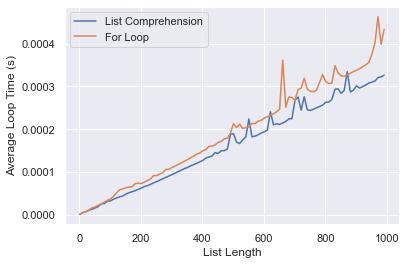

In [212]:
import seaborn as sns
# sns.set()
ax = sns.lineplot(x = range(1, 1000, 10), y = averages, label = 'List Comprehension')
ax = sns.lineplot(x = range(1, 1000, 10), y = averages1, label = 'For Loop')
# ax.set_xlim([0, 300])
# ax.set_ylim([0, .0001])
ax.set_xlabel('List Length')
ax.set_ylabel('Average Loop Time (s)')